In [2]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

In [3]:
tickers = ["NVDA", "ACWI", "2382.TW", "5406.T", "TRENT.NS", "FRO", "WMT", "DBC","GLD"]  # Add more tickers as needed
start_date = '2019-10-01'
end_date = '2023-10-01'

data = yf.download(tickers, start=start_date, end=end_date, interval="1mo")['Adj Close']


[*********************100%***********************]  9 of 9 completed


In [4]:
returns = data.pct_change().dropna()


In [61]:
weights = [0.1, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]  # Adjust weights as needed
initial_investment = 100  # Initial investment amount


In [62]:
# Rebalance portfolio and calculate portfolio value
portfolio_value = []
benchmark_value = []

for i in range(len(returns)):
    if i == 0:
        # Initial investment
        portfolio_value.append(initial_investment)
        benchmark_value.append(initial_investment)
    else:
        # Rebalance portfolio based on weights
        portfolio_value.append(np.dot(weights, portfolio_value[-1] * (1 + returns.iloc[i].values)))

        # Calculate benchmark value
        benchmark_value.append(benchmark_value[-1] * (1 + returns["ACWI"].iloc[i]))


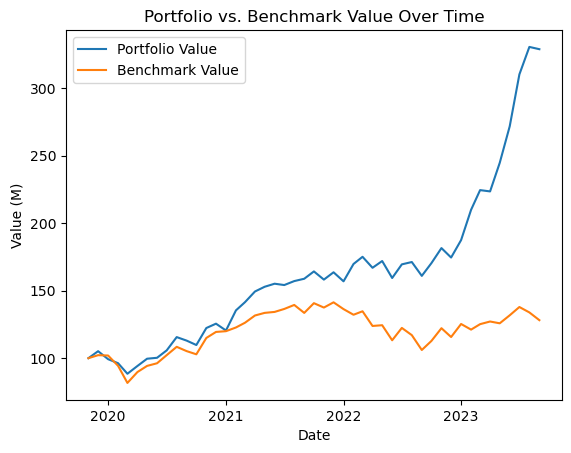

In [63]:
# Plot results with modified date axis
plt.plot(returns.index, portfolio_value, label='Portfolio Value')
plt.plot(returns.index, benchmark_value, label='Benchmark Value', linestyle='-')
plt.title('Portfolio vs. Benchmark Value Over Time')
plt.xlabel('Date')
plt.ylabel('Value (M)')

# Format date ticks on x-axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.legend()
plt.show()

In [8]:
# Calculate drawdown
def calculate_drawdown(cumulative_values):
    peak = np.maximum.accumulate(cumulative_values)
    drawdown = (cumulative_values - peak) / peak
    return drawdown

In [10]:
# Calculate drawdown for portfolio and benchmark
portfolio_drawdown = calculate_drawdown(portfolio_value)
benchmark_drawdown = calculate_drawdown(benchmark_value)

In [11]:
# Find the maximum drawdown
max_portfolio_drawdown = portfolio_drawdown.min()
max_benchmark_drawdown = benchmark_drawdown.min()

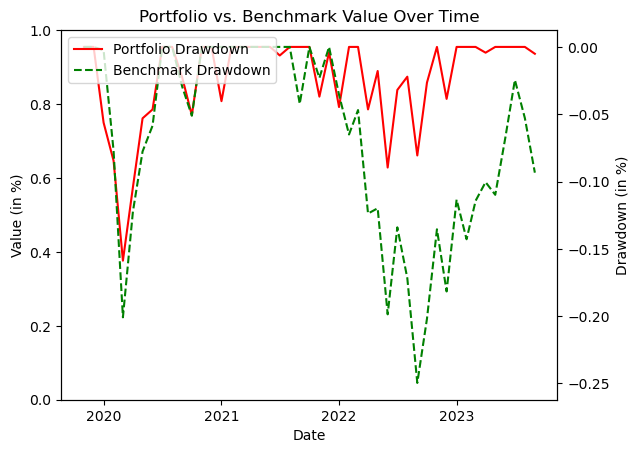

In [12]:
# Plot results with modified date axis
fig, ax1 = plt.subplots()
# Plot maximum drawdown
ax2 = ax1.twinx()
ax2.plot(returns.index, portfolio_drawdown, linestyle='-', color='red', label='Portfolio Drawdown')
ax2.plot(returns.index, benchmark_drawdown, linestyle='--', color='green', label='Benchmark Drawdown')

ax1.set_title('Portfolio vs. Benchmark Value Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Value (in %)')

ax2.set_ylabel('Drawdown (in %)')
# Format date ticks on x-axis
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

In [13]:
# Print maximum drawdown values
print(f"Maximum Portfolio Drawdown: {max_portfolio_drawdown:.2%}")
print(f"Maximum Benchmark Drawdown: {max_benchmark_drawdown:.2%}")

Maximum Portfolio Drawdown: -15.88%
Maximum Benchmark Drawdown: -24.97%


In [14]:
# Look at the perf in the time of the different assets 

In [15]:
# Calculate cumulative returns
cumulative_returns = (1 + returns / 100).cumprod()

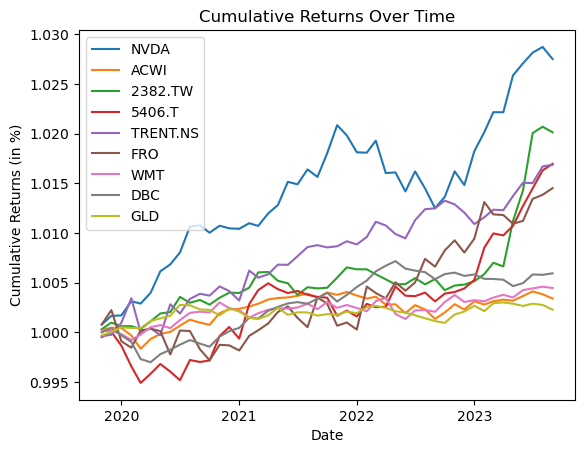

In [16]:
# Plot results with modified date axis
for ticker in tickers:
    plt.plot(returns.index, cumulative_returns[ticker], label=ticker)

plt.title('Cumulative Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns (in %)')

# Format date ticks on x-axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.legend()
plt.show()